In [1]:
#Filter based on class "metal", "plastic", "wood,paper"

In [2]:
import numpy as np
import pandas as pd
import os
import shutil
import torchvision.transforms as transforms
import PIL

c:\Users\Frank\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
annotations = pd.read_csv('./annotations_text.csv')
annotations

,Unnamed: 0,No.,Object name,Material,Stained,Surface properties
0,0,1,Christmas bear,['cloth'],['pluriform'],['']
1,1,2,Lab-keys,"['metal', 'cloth']",[''],"['composite', 'shiny']"
2,2,3,Apricot,['fruit'],['uniform'],['']
3,3,4,Round candle,"['candle', 'metal']",[''],"['composite', 'shiny']"
4,4,5,Nut,['wood'],['uniform'],['ribbed']
...,...,...,...,...,...,...
995,995,996,lotion,"['plastic', 'paper']",['pluriform'],"['shiny', 'composite']"
996,996,997,cleansing milk,"['plastic', 'paper']",['pluriform'],"['shiny', 'composite']"
997,997,998,vogue deodorant,"['metal', 'plastic']",['pluriform'],"['shiny', 'composite']"
998,998,999,ALOI recording,"['metal', 'plastic']",['uniform'],"['shiny', 'composite']"


In [4]:
#convert material string to list
def convert_to_list(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace('\'','')
    x = x.replace('\'','')
    x = x.replace(' ','')
    x = x.split(',')
    return x

annotations['Material'] = annotations['Material'].apply(convert_to_list)

In [5]:
source_dir = "./aloi_red4_col/png4/"
target_dir = "./Filtered/"

In [6]:
#remove target directory if it exists
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)

In [7]:
#make target directory
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

In [8]:
pd_label = pd.DataFrame(columns=['filename', 'item_type' ,'label'])

In [9]:
for folder in os.listdir(source_dir):
    item_number = int(folder)
    material = annotations.loc[annotations['No.'] == item_number, 'Material'].iloc[0]
    if (len(material) == 1):
        material = material[0]
        if (material == 'metal'):
            for file in os.listdir(source_dir + folder):
                shutil.copy(source_dir + folder + "/" + file, target_dir + file)
                pd_label = pd_label.append({'filename': file, 'item_type': int(folder), 'label': 'metal'}, ignore_index=True)
        elif (material == 'plastic'):
            for file in os.listdir(source_dir + folder):
                shutil.copy(source_dir + folder + "/" + file, target_dir + file)
                pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'plastic'}, ignore_index=True)
        elif (material == 'wood' or material == 'paper'):
            for file in os.listdir(source_dir + folder):
                shutil.copy(source_dir + folder + "/" + file, target_dir + file)
                pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'wood,paper'}, ignore_index=True)
    else:
        #we only want to keep images with which are exclusively metal, plastic or wood/paper
        if (('metal') in material and ('plastic') not in material and ('wood, paper') not in material):
            for file in os.listdir(source_dir + folder):
                shutil.copy(source_dir + folder + "/" + file, target_dir + file)
                pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'metal'}, ignore_index=True)
        elif (('metal') not in material and ('plastic') in material and ('wood, paper') not in material):
            for file in os.listdir(source_dir + folder):
                shutil.copy(source_dir + folder + "/" + file, target_dir + file)
                pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'plastic'}, ignore_index=True)
        elif (('metal') not in material and ('plastic') not in material and ('wood, paper') in material):
            for file in os.listdir(source_dir + folder):
                shutil.copy(source_dir + folder + "/" + file, target_dir + file)
                pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'wood,paper'}, ignore_index=True)

C:\Users\Frank\AppData\Local\Temp\ipykernel_21628\4210187602.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'plastic'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_21628\4210187602.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'plastic'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_21628\4210187602.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_label = pd_label.append({'filename': file,'item_type': int(folder), 'label': 'plastic'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_21628\42101876

In [10]:
pd_label 

,filename,item_type,label
0,100_i110.png,100,plastic
1,100_i120.png,100,plastic
2,100_i130.png,100,plastic
3,100_i140.png,100,plastic
4,100_i150.png,100,plastic
...,...,...,...
7747,997_i180.png,997,plastic
7748,997_i190.png,997,plastic
7749,997_i210.png,997,plastic
7750,997_i230.png,997,plastic


<AxesSubplot: >

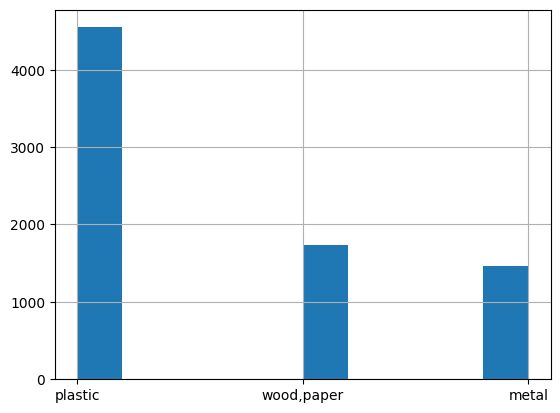

In [11]:
#histogram of labels
pd_label['label'].hist()

In [12]:
#save labels to csv
pd_label.to_csv('Original_labels.csv', index=False)

In [13]:
#next step: split into train, validation and test set
#call the script "TrainTestValFilter.ipynb"